In [23]:
# this cell imports all necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# hyperparameters
reluFactor=0.001

In [25]:
# Takes in a matrix and returns a new matrix by calculating element wise Sigmoid.
#Dimensions of output matrix are same as input matrix
def sigmoid(Z):
    A=1/(1+np.exp(-Z))
    return A


# To test the above function

# Z=np.linspace(-10,10,100)
# Z=np.array(Z).reshape((100,1))
# A=sigmoid(Z)

# # print(Z)
# # print(A)

# plt.plot(Z,A)
# plt.show()



In [26]:
# Takes in a matrix and returns a new matrix by calculating element wise sigmoid derivatve.
#Dimensions of output matrix are same as input matrix

# np.multiply is element wise multiplication
def derSigmoid(Z):
    sig=sigmoid(Z)
    der=np.multiply(sig,1-sig)
    return der

# derSigmoid=derSigmoid
    
# To test the above function

# Z=np.linspace(-10,10,100)
# Z=np.array(Z).reshape((100,1))
# der=derSigmoid(Z)

# # print(Z)
# # print(der)

# plt.plot(Z,der)
# plt.show()


In [27]:
# Takes in a matrix and returns a new matrix by calculating element wise relu activation.
#Dimensions of output matrix are same as input matrix
# reluFactor is for negative elements

def relu(Z):
    A=np.maximum(reluFactor*Z,Z)
    return A

# relu=relu
# To test the above function
# Z=np.linspace(-10,10,100)
# Z=np.array(Z).reshape((100,1))
# A=relu(Z)

# # print(Z)
# # print(A)

# plt.plot(Z,A)
# plt.show()
    

In [28]:
# Takes in a matrix and returns a new matrix by calculating element wise relu derivatve.
#Dimensions of output matrix are same as input matrix

# reluFactor is for negative Z

def derRelu(Z):
    der=np.where(Z<0,reluFactor,1)
    return der

# derRelu=derRelu
    
# To test the above function

# Z=np.linspace(-10,10,100)
# Z=np.array(Z).reshape((100,1))
# der=derRelu(Z)

# # print(Z)
# # print(der)

# plt.plot(Z,der)
# plt.show()


In [55]:
# This is the  cell where all the hyperparameters are defined


# this is factor by which all the negatives will be multiplied in relu function

alpha= 0.01 #learning rate
m=10 #number of examples in training set
numberOfLayers=4 #including input and output layer
activations=[None,relu,relu,sigmoid]
derActivations=[None,derRelu,derRelu,derSigmoid]
neurons=[10,5,3,1]
numberOfIterations=1000



In [44]:
# All the parameters



parameters=[]
parameters.append({})


for i in range(1,numberOfLayers): 
    param={}
    param["W"]  =np.random.randn(neurons[i],neurons[i-1])*0.01
    param["dW"] =np.zeros((neurons[i],neurons[i-1]))
    param["b"]  =np.zeros((neurons[i],1))
    param["db"] =np.zeros((neurons[i],1))
    param["Z"]  =np.zeros((neurons[i],m))
    param["dZ"] =np.zeros((neurons[i],m))
    param["A"]  =np.zeros((neurons[i],m))

    parameters.append(param)


# test the above code by printing size

# for i in range(1,numberOfLayers):
#     print("===============================================================")
#     print("W",parameters[i]["W"].shape)
#     print("dW",parameters[i]["dW"].shape)
#     print("b",parameters[i]["b"].shape)
#     print("db",parameters[i]["db"].shape)
#     print("Z",parameters[i]["Z"].shape)
#     print("dZ",parameters[i]["dZ"].shape)
#     print("A",parameters[i]["A"].shape)



In [45]:
# This function calculates Z for a given layer.

# W is the weight matrix for the given layer.
# dimensions of  W are (n[l],n[l-1]), 
# where n[l] represens number of nodes in the given layer l. 

# b is the bias vector of size (n[l]x1) of current layer

# A is the output from the previous layer.
# dimensions of A are (n[l-1]xm),
# where m is the number of training examples.

# NOTE: np.dot computes normal matrix multiplication not element wise multiplication 

# returns Z with dimensions (n[l]xm)
def calculateZ(A,W,b):
    Z=np.dot(W,A)+b
    return Z



# To test the above function
# A=np.array([[1,2],[2,3]])
# W=np.array([[1,2],[3,4]])
# b=np.array([5,6]).reshape((2,1))
# print(A)
# print(W)
# print(b)
# Z=calculateZ(A,W,b)
# print(Z)

In [46]:
# This function calculates the logistic  regression loss.
# Y is the expected output and A is the output of the final layer.
# returns a single value, the loss/cost.
# dimensions of A and Y are (n[output]xm)
# where n[l] is the number of neurons in output layer

# return a loss matrix of size (n[output],n[output])


# TODO: understand multiclass classification and performm required changes
def calculateLoss(Y,A):
    L=(np.dot(Y,np.transpose(np.log(A)))+np.dot(1-Y,np.transpose(np.log(1-A))))
    L=-L/m
    return L

# To test the above function


# Y=np.linspace(0,10,100)
# Y=np.array(Y).reshape((1,100))
# A=np.random.randn(1,100).reshape((1,100))
# A=sigmoid(A)

# # print(A)
# # print(Y)

# L=calculateLoss(Y,A)
# print(L)

# plt.plot(np.transpose(A),np.transpose(Y))
# plt.plot(Y,A)
# plt.show()

In [47]:
# This function calculates the derivative of the cost function.
# Y is the expected output and A is the output of the final layer.
# returns a matrix derL with same dimensions as of Y and A
# dimensions of A and Y are (n[output]xm)
# where n[l] is the number of neurons in output layer

# TODO: test the function
def derL(Y,A):
    derL=np.true_divide(1-Y,1-A)-np.true_divide(Y,A)
    return derL

    

In [48]:
# calculates the derivative of W for a single layer.
# Parameters: 
# dZ is derivative of Z of the same layer.
# dimensions of  dZ are (n[l],m),where n[l] is number of neurons in the layer
# A is ouptut of the previous layer.
# dimensions of A are (n[l-1],m)
# returns dW with dimensions (n[l],n[l-1])


# TODO: test the function
def derW(dZ,A):
    dW=np.dot(dZ,np.transpose(A))/m;
    return dW
    

In [49]:
# calculates the derivative of b for a single layer.
# Parameters: 
# dZ is derivative of Z of the same layer.
# dimensions of  dZ are (n[l],m),where n[l] is number of neurons in the layer
# returns db with dimensions (n[l],1)

# TODO: test the function
def derB(dZ):
    db=np.sum(dZ,axis=1,keepdims=True)/m;
    return db

In [50]:
# calculates the derivative of Z for a single layer.
# Parameters: 
# dZ is derivative of Z of the next layer.
# dimensions of  dZ are (n[l+1],m),where n[l] is number of neurons in the layer
# dW is derivative of W of the next layer.
# dimensions of  dW are (n[l+1],n[l])
# Z of current layer.
# dimensions of  Z are (n[l],m)
# returns dZ with dimensions (n[l],m)


# TODO: test the function
def derZ(dW,dZ,Z,derActi):
    dZNew=np.multiply(np.dot(np.transpose(dW),dZ),derActi(Z))
    return dZNew


In [51]:
# forward propagate for the given layer.
# parameter is the layer name
# calculates and stores Z and A

# TODO: test the function
def forwardPropagation(layer):
    W=parameters[layer]["W"]    #current layer
    b=parameters[layer]["b"]    #current layer
    A=parameters[layer-1]["A"]  #previous layer

    Z=calculateZ(A,W,b)
    parameters[layer]["Z"]=Z    #current layer


    A=activations[layer](Z)
    parameters[layer]["A"]=A    #current layer


    # testing
    # print(layer,"===============")
    # # plt.plot(W,label="W")
    # plt.plot(b,label="b")
    # print(b)
    # plt.plot(A,label="A")
    # print(A)


    # plt.plot(Z,label="Z")
    # plt.title(layer)
    # plt.legend()
    # plt.show()

In [52]:
# updates parameters for the given layer.
# parameter is the layer name
# calculates and stores dW,db
# updates W and b 
# TODO: test the function
def updateParameters(layer):
    

    
    W=parameters[layer]["W"]
    b=parameters[layer]["b"]
    dW=parameters[layer]["dW"]
    db=parameters[layer]["db"]

    W=W-alpha*dW
    b=b-alpha*db

    parameters[layer]["W"]=W
    parameters[layer]["b"]=b
    
    

In [53]:
# backward propagate for the given layer.
# parameter is the layer name
# calculates and stores dZ
# TODO: test the function
def backwardPropagation(layer):
    Z=parameters[layer]["Z"]    #current layer

    if(layer==numberOfLayers-1):
        A=parameters[layer]["A"]
        dL=derL(Y,A)
        dZ=np.multiply(dL,derActivations[layer](Z))
    else:
        dZ=parameters[layer+1]["dZ"]  #next layer
        dW=parameters[layer+1]["dW"]  #next layer    
        dZ=derZ(dW,dZ,Z,derActivations[layer])  #current layer

    parameters[layer]["dZ"]=dZ
    A=parameters[layer-1]["A"]  #previous layer

    dW=derW(dZ,A)               #current layer
    parameters[layer]["dW"]=dW
    db=derB(dZ)               #current layer
    parameters[layer]["db"]=db    





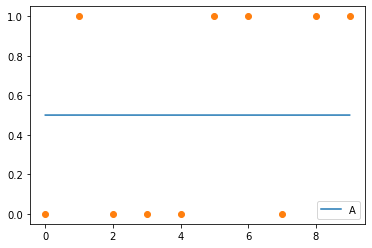

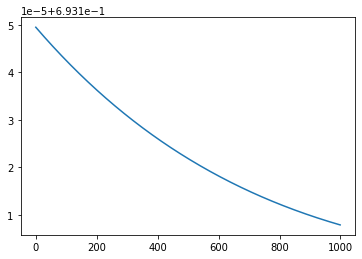

In [54]:
# learning
# TODO:test the function

#generating random output to test the code
Y=np.random.randn(1,m)
Y=np.where(Y<0,0,1)

# genrating random input to test the code
parameters[0]["A"]=np.random.randn(neurons[0],m)
costs=[]


for i in range(numberOfIterations):
    for layer in range(1,numberOfLayers):
        forwardPropagation(layer)

    
    A=parameters[numberOfLayers-1]["A"]
    l=calculateLoss(Y,A)
    costs.append(l[0][0])

    for layer in range(numberOfLayers-1,0,-1):
        backwardPropagation(layer)

    for layer in range(1,numberOfLayers): 
        updateParameters(layer)

A=parameters[numberOfLayers-1]["A"]
plt.plot(np.transpose(A),label="A")
plt.plot(np.transpose(Y),'o')
plt.legend(loc="best")
plt.show()

plt.plot(costs)
plt.show()

In [43]:
def processInput(X):
    A=X
    for layer in range(1,numberOfLayers):
       
        W=parameters[layer]["W"]
        b=parameters[layer]["b"]
        Z=calculateZ(A,W,b)
        A=activations[layer](Z)
    return A




# test
X=np.random.randn(neurons[0],1)
A=processInput(X)
print(A)

[[0.59143996]]
